In [1]:
# import useful packages
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
# read file from csv
def read_file(filepath):
    if filepath.endswith("csv"):
        return pd.read_csv(filepath)
    elif filepath.endswith("csv"):
        return pd.read_csv(filepath)


In [3]:
#  standardization of data
def standardization(data):
    assert len(data.shape)==2

    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)

    new_data=(data-mean)/std
    return new_data



In [4]:
# normalization of data
def normalization (data,new_max=1,new_min=0):
    assert len(data.shape)==2
    max=np.max(data,axis=0)
    min=np.min(data,axis=0)
    new_data=(data-min)*(new_max-new_min)/(max-min)+new_min
    return new_data

In [5]:
def splitXY(data,features,label):
    return data[features],data[label]

In [6]:
data=read_file("./data/data.csv")
data=np.array(data)
data=normalization(data)

X=data[:,0:-1]
Y=data[:,-1]


In [11]:
# train model
def train(X,Y,alpha=0.01,num_iters=100):
    row=X.shape[0]
    col=X.shape[1]

    X = np.hstack((np.ones((X.shape[0],1)),X)) 

    theta = np.zeros((col+1,1))

    theta=gradientDescent(X,Y,theta,alpha,num_iters)
    
    return theta



def gradientDescent(X,Y,theta,alpha,num_iters):
    a=[]
    for i in range(num_iters):
        # update theta with matrix 
        theta=theta-((alpha/X.shape[0])*(X.T@(X@theta-Y)))
        a.append(computeCost(X,Y,theta))

    plt.plot(a,range(num_iters))
    return theta


def computeCost(X,Y,theta):
    diff=X@theta - Y
    cost=np.sum((diff.T)@(diff))/(2*X.shape[0])
    return cost 

def predict(X,theta):
    X = np.hstack((np.ones((X.shape[0],1)),X)) 
    re=X@theta
    return re

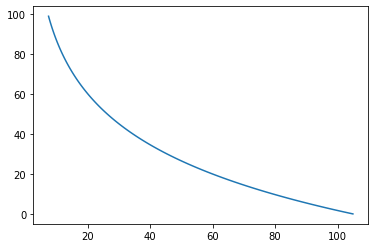

In [13]:
a=train(X,Y)